# Introduction to Python for the course "Foundations of Operations Research"

This page is an interactive way to make your first steps in the Python programming language and solve a few practical optimization problems.

This tutorial shows:

* How to write simple Python programs;
* Some of the libraries we'll use during the course;
* A note on Jupyter Notebooks.

This tutorial does _not_ show how to become proficient in Python. For that there is no lack of resources, even in your language. A good starting point is the Python documentation [page](https://docs.python.org), which contains a [tutorial](https://docs.python.org/3/tutorial/index.html). If you like this interactive way of writing code, see at the bottom of this page for more information on Jupyter notebooks. The most useful thing is the following: you can modify the code and re-run it with `shift`+`enter`.

Let's get started!

![Mandatory XKCD reference for Python (Copyright xkcd.com)](https://imgs.xkcd.com/comics/python.png)

Python is a very simple, intuitive, and readable scripting language. It can be used to write short programs that automate a task (for instance, filter out some rows in a text file) but it can also be the language of choice for large software projects.

Below is a sample script. Click on its cell and then choose "Run" in the toolbar, or simply hit `shift`+`enter`.

In [2]:
import math

n = 712515131
print('Let me check if', n, 'is prime')

# List of dividers
dividers = []

# Check all numbers until the square root of n
# Checking larger numbers is pointless.
for k in range(2, 1 + math.floor(math.sqrt(n))):
    if n // k == n / k:
        dividers.append(k)

if dividers == []:
    print('Yes,', n, 'is prime')
else:
    print('No,', n, 'is not prime: it is divisible by', dividers)

Let me check if 712515131 is prime
Yes, 712515131 is prime


The script checks if 712515131 is prime. To do so, it checks if, for any $k$ between 2 and $\left\lfloor\sqrt{n}\right\rfloor$, including extremes, the integer division between $n$ and $k$ (which is done in Python with the `//` operator) is the same as $\frac{n}{k}$. If this is the case for at least one of the values of $k$, then the number is not prime. In this case, it adds $k$ to the list of dividers (which was initialized to an empty list, `[]`).

A few remarks are in order:
* We need a module for non-trivial math functions floor and the square root (sqrt). This is why we write `import math` at the beginning. The `math` module contains most math functions, while Python has the basic arithmetic functions: sum, subtraction, multiplication, division, integer division (with `//`), power (for instance `n**4` returns $n^4$).
* The `range` keyword returns all numbers in a range. For instance, `range(4)` contains all numbers from 0 to 3, extremes included, while `range(4,14)` gives all numbers from 4 to 13. This is why we need the `1 + ` in the `range` call.
* Lists are one of the native Python types, and perhaps the most convenient. They can be used in a number of ways, and it is very useful to learn to use them.
* Needless to say, comments begin with a `#`. All text from `#` to the end of the line is ignored.

Let's break the above script and analyze each part.

In [3]:
import math

n = 712515131
print('Let me check if', n, 'is prime')

Let me check if 712515131 is prime


This is easy. We first tell Python we'll need the `math` module, then create a variable `n` of value 712515131. Finally we print a string containing the value of `n`. The `print` function in Python can have various levels of complexity and is very versatile. Next chunk:

In [4]:
# List of dividers
dividers = []

This creates another variable and assigns the empty list `[]` to it. Lists can be _appended_ (one element is added to the tail) or _extended_ (another list is concatenated to the end). For example:

```python
l = [1, 2, 3]
l.append(5)
```

will result in `l` being `[1,2,3,5]`. If we then run `l.extend([3,4])` then `l` becomes `[1,2,3,5,3,4]`.

On to the next chunk:

In [5]:
# Check all numbers until the square root of n
# Checking larger numbers is pointless.
for k in range(2, 1 + math.floor(math.sqrt(n))):
    if n // k == n / k:
        dividers.append(k)

This is obviously the core of the algorithm. I would not advise checking for prime numbers this way, but the sense is as follows:

* For all numbers from 2 to $\left\lfloor\sqrt{n}\right\rfloor$ included:
  * If $\left\lfloor \frac{n}{k}\right\rfloor = \frac{n}{k}$,
    * then add $k$ to the list of dividers.

The first line is implemented with `range(2, 1+M)` where $M=\left\lfloor \sqrt{n} \right\rfloor$ to make sure that $M$ is included in the list of checked dividers.

The second line checks for equality of the integer division of `n` and `k` and their real division. When they are equal, $k$ is a divider of $n$. In that case, the third line appends $k$ to the list. At the end of the loop, `dividers` will be the list of all $k$ for which the condition on the second line is satisfied.

In [6]:
if dividers == []:
    print('Yes,', n, 'is prime')
else:
    print('No,', n, 'is not prime: it is divisible by', dividers + [n // d for d in reversed(dividers)])

Yes, 712515131 is prime


The last part is the output. If the list `dividers` is still empty, the number is clearly prime. Otherwise we list all of the dividers found, at least those up to $\left \lfloor\sqrt{n}\right\rfloor$. If larger ones are desired, one can find them easily by dividing $n$ by the numbers in the list. Below is an alternative instruction that prints them in non-decreasing order.

Note that if $n$ is a perfect square, i.e. $n=p^2$ with $p \in \mathbb N$, then $p$ will show up twice in the output.

Apart from a very good language structure, Python has a super-rich set of modules for doing a lot of things. Modules contain functions and data, and one can use all or part of it when invoking the module. Working with Python is great when making use of its modules. They can be installed with `pip`, which is invoked as follows with, for example, `numpy`:

```bash
pip install numpy
```

## Numpy

Numpy is a module for fast operations on _multiarrays_, i.e., vectors, matrices, and tensors. All operations one would normally do between scalars can be done on vectors just as easily. For instance, for two arrays `x` and `y` of the same size, `x+y` is the obvious sum of the arrays, while `x*y` is the vector of equal size containing the element-wise product. The dot product is computed with `numpy.dot(x,y)`.

In [7]:
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([10,4,0,1,2])

print('a + b =', a+b)
print('a * b =', a*b)
print('dot product:', np.dot(a,b))

a + b = [11  6  3  5  7]
a * b = [10  8  0  4 10]
dot product: 32


Numpy does these operations very quickly even for very large arrays, and it does it with concise syntax. Matrix/vector multiplication is done with the `@` operator.

Here's another useful tip: instead of repeating `numpy.` before using each function of the Numpy module, we can import it with an _alias_ (`np` in this case) for short.

In [8]:
import numpy as np

A = np.array([[2,5,3,4],[5,6,8,7],[1,2,8,10]])  # 3x4 matrix
b = np.array([7,10,0,2])

print(A@b)

[ 72 109  47]


## Matplotlib

The module `matplotlib` is one of many plotting modules, and perhaps one of the best known. It is ideal for plotting both in 2D and 3D, and uses a very simple and concise syntax. See the example below, but more interestingly see the [gallery of examples](https://matplotlib.org/stable/gallery/index.html).

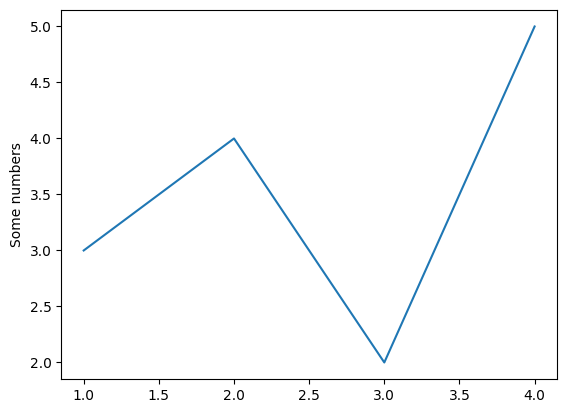

In [9]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [3,4,2,5])
plt.ylabel('Some numbers')
plt.show()

## Jupyter notebooks


A notebook is a sequence of cells. Each cell can contain (Python) code or text. The text cells can be filled with simple text or, preferably, formatted with [Markdown](https://www.markdownguide.org/) for readability. Markdown allows for language-specific syntax highlighting of code like 

```python
name = 'Groot'
print('Hello world, I am', name)
```

and also $\LaTeX$ formulae such as $\int_{-\infty}^\sqrt{2}x^{\sin x}dx$, easy creation of tables, item lists, text in _italics_ and __bold__, etc (if you see this text already rendered, double click on the cell to see the source).

Cells can contain code as well. Each cell can be run independently, and the results (variables created, for instance) are persistent until one resets the kernel. The normal flow of a notebook is to run each cell in the natural order, but it is obviously possible to re-run a cell after it has changed.